In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse

In [4]:
df = pd.read_csv('./Steels_kaggle.csv')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [5]:
df.shape

(915, 20)

In [6]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [10]:
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', ' Temperature (°C)']]
Y = df[' 0.2% Proof Stress (MPa)']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-8.36804975e+00,  9.91474091e+01,  1.26657836e+02, -2.02908186e+03,
       -1.45783450e+01,  9.75144720e+01,  2.68570997e+01,  4.15824326e+01,
       -1.17355722e+02,  6.83510801e+02,  1.12585395e+03, -2.92043073e+03,
       -3.41185503e-01])

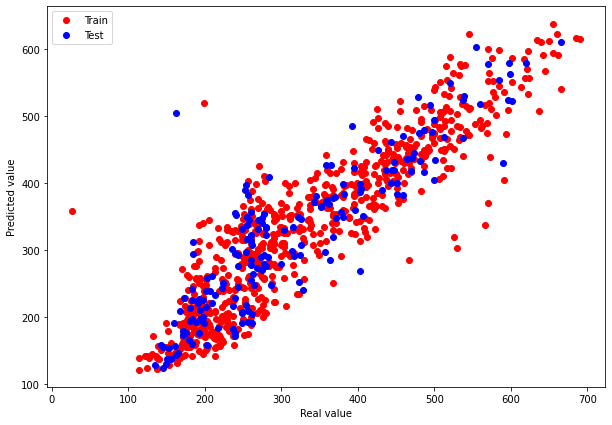

In [13]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, lr.predict(X_train), 'or', label='Train')
plt.plot(y_test, lr.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [16]:
mse_test = mse(y_test, lr.predict(X_test), squared=False)
mse_train = mse(y_train, lr.predict(X_train), squared=False)
print("MSE for test is", mse_test, "and MSE for train is", mse_train)

MSE for test is 56.92234883460384 and MSE for train is 54.85495366911829
